https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [107]:
import pandas as pd

In [108]:
df = pd.read_csv(r'C:\Users\Marcos\BootCamp_DS\Repo_Clase\Copia para trabajar\3-Machine_Learning\3-Reg&Class\5-Decision_Trees\ejercicio\data\temps.csv')

### 2. Lidia con las variables categóricas del dataset

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [110]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [111]:
# valores unicos de la columna week

In [112]:
# valores de la columna week

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [113]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['week'])
le.transform(df['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [114]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [115]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df['week'] = df['week'].replace(my_dict)

C:\Users\Marcos\AppData\Local\Temp\ipykernel_4676\2500110800.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(my_dict)


In [116]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [117]:
months_g = df.groupby('month')['temp_1'].mean().reset_index()
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [118]:
df = pd.merge(df,months_g,left_on='month',right_on='month',how='inner')

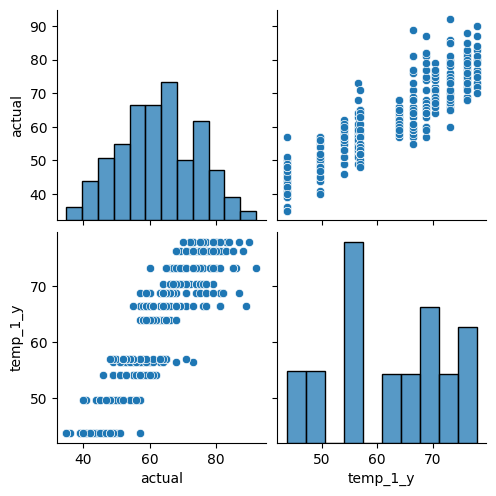

In [119]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

<Axes: >

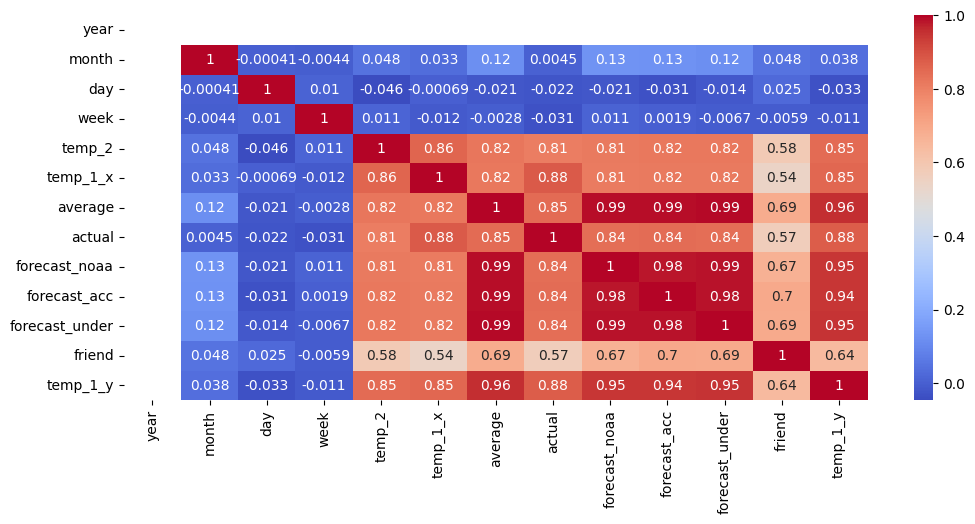

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [121]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [122]:
from sklearn.model_selection import train_test_split
x = df.loc[:,[ 'month', 'temp_2', 'temp_1_x', 'average',
        'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y']]
y = df.loc[:,'actual']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=278,random_state=42)

In [124]:
print("X_train", x_train.shape)
print("X_test", x_test.shape)
print("y_train", y_train.shape)
print("y_train", y_test.shape)

X_train (278, 9)
X_test (70, 9)
y_train (278,)
y_train (70,)


### 4. Entrena el modelo


In [125]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
y_pred = dtr.predict(x_test)
y_pred

array([77., 68., 57., 68., 76., 76., 71., 79., 69., 74., 69., 67., 39.,
       59., 74., 56., 63., 54., 55., 79., 59., 57., 71., 55., 63., 48.,
       66., 45., 60., 77., 71., 68., 56., 88., 73., 60., 51., 48., 74.,
       40., 77., 57., 82., 40., 59., 76., 60., 85., 51., 39., 40., 39.,
       63., 64., 71., 61., 55., 62., 55., 53., 67., 46., 60., 71., 69.,
       60., 71., 67., 80., 39.])

In [127]:
dtr.feature_importances_

array([0.01795869, 0.02500557, 0.76629145, 0.12184442, 0.01769503,
       0.01278608, 0.02133042, 0.01419187, 0.00289647])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [128]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6942102682063918
MAE 5.1571428571428575
MAPE 0.0819493758148923
MSE 42.75714285714286
RMSE 6.5388946204341645


In [129]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(x_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(x_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(x_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(x_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(x_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

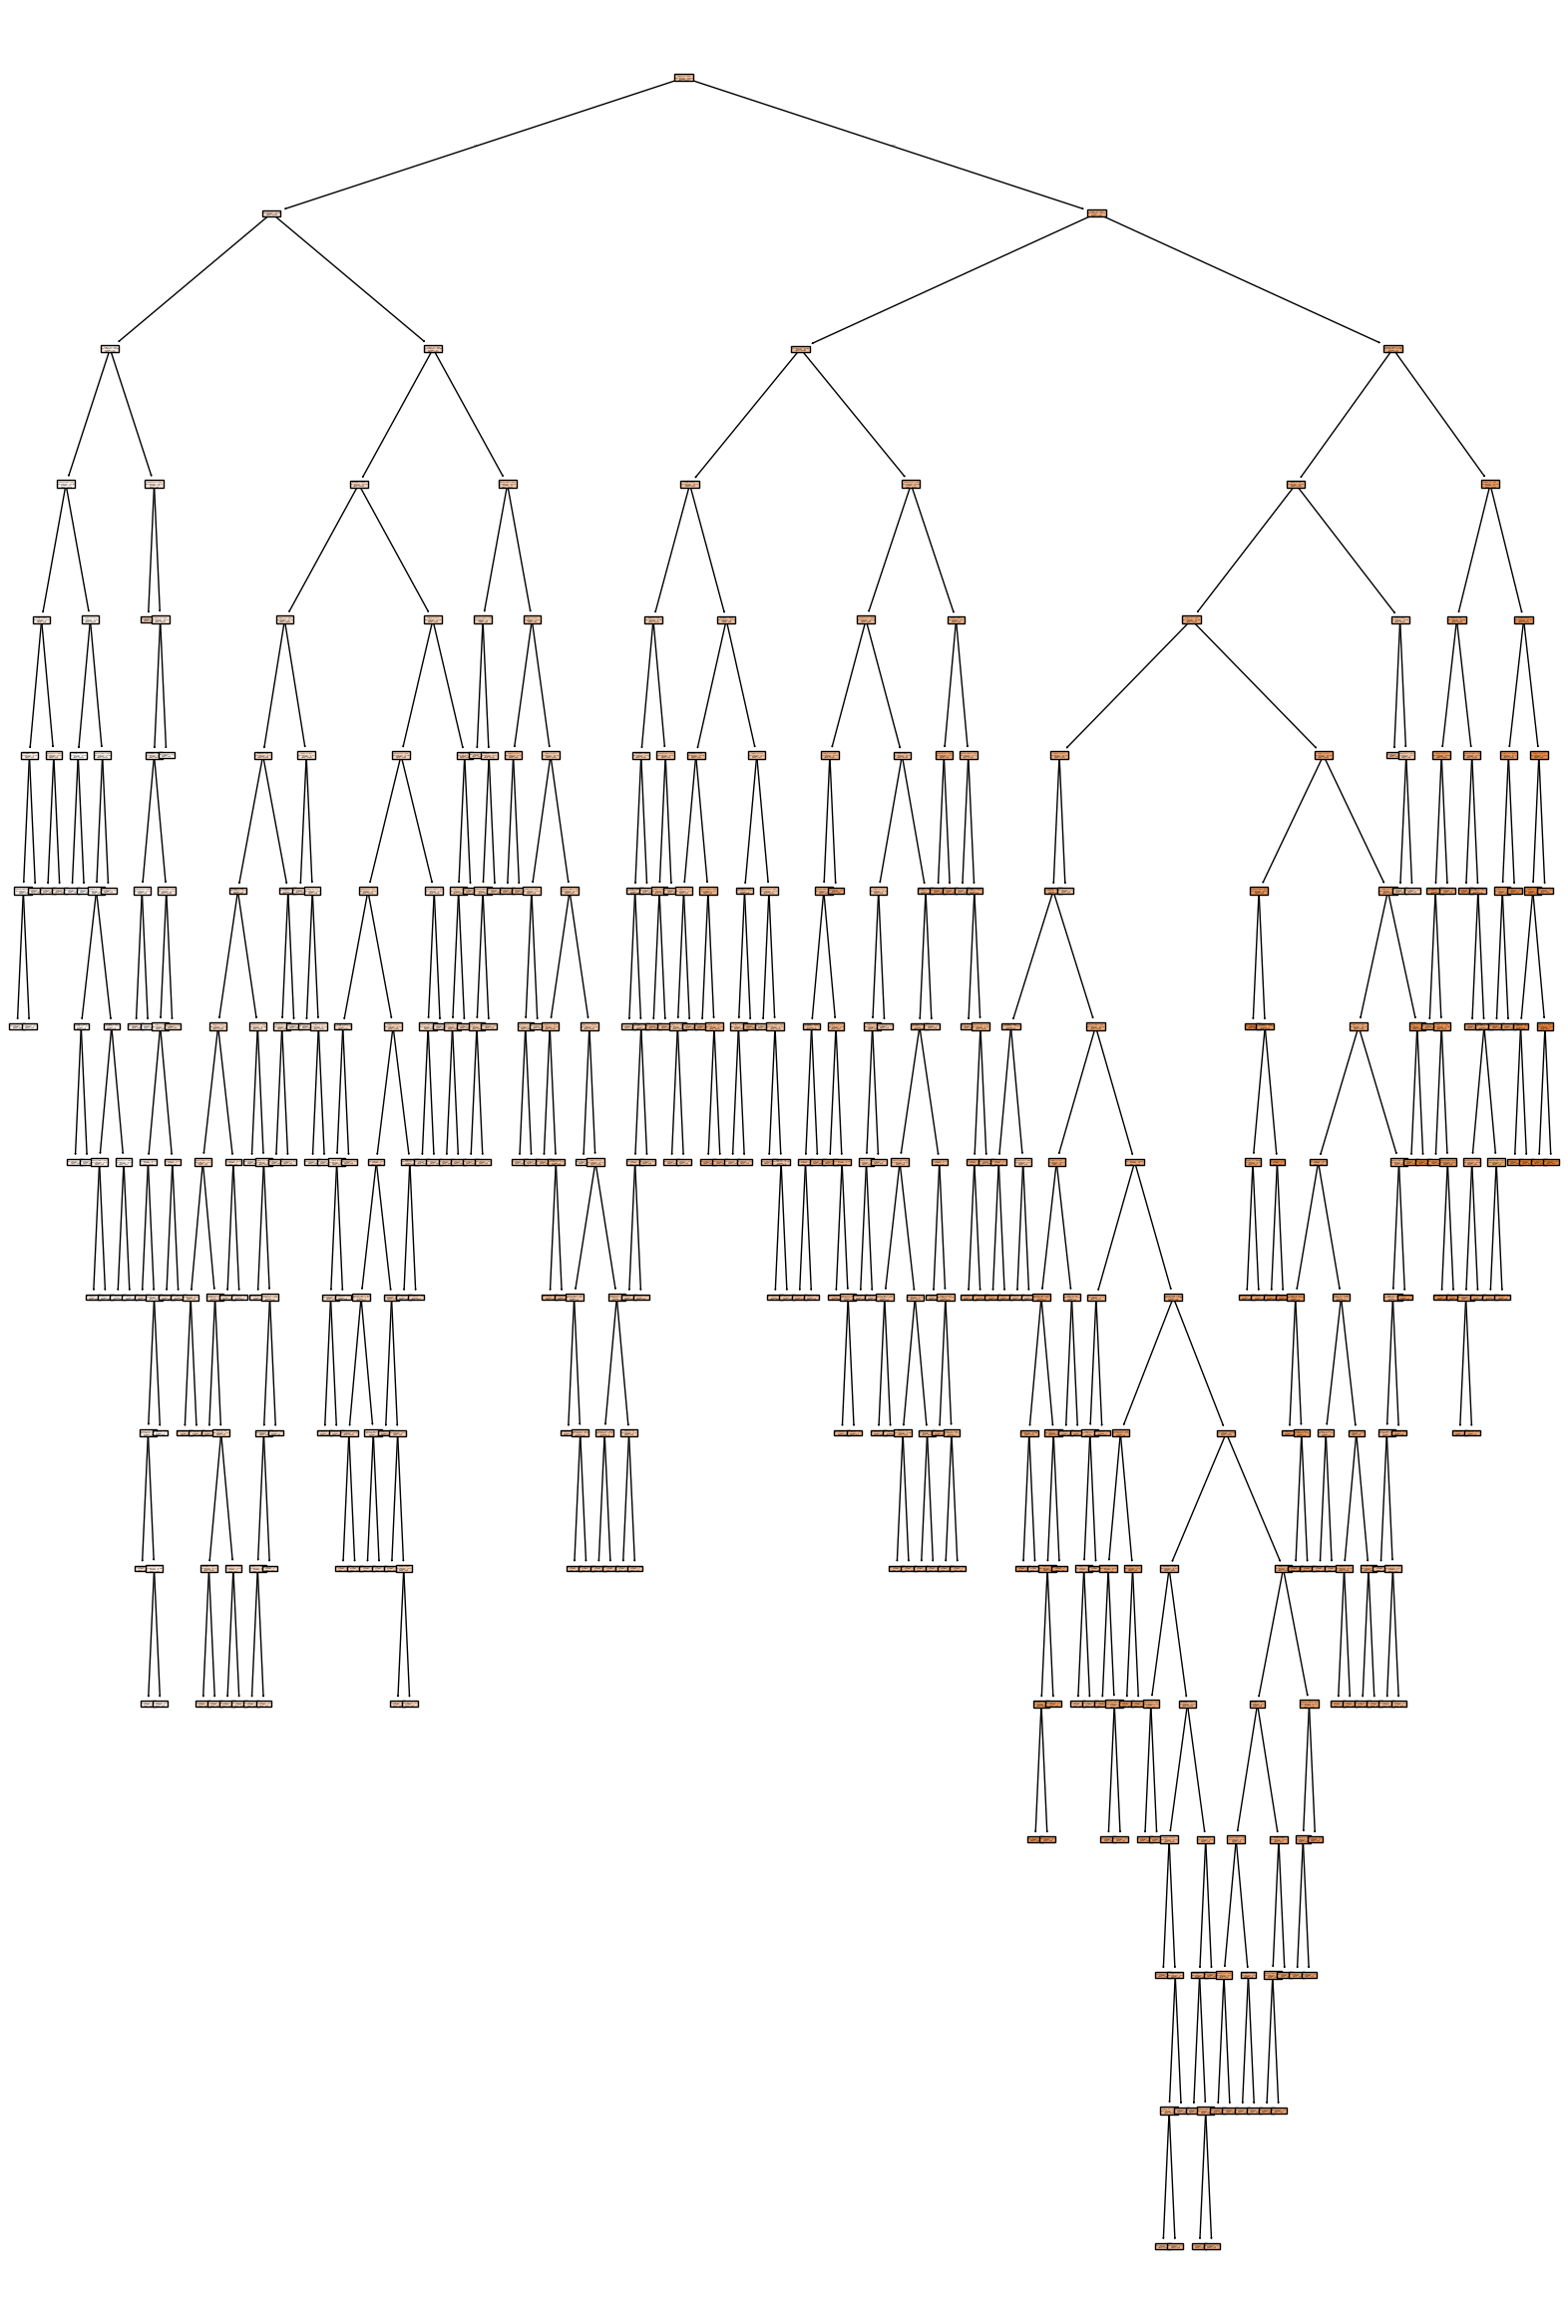

In [130]:
import sklearn
plt.figure(figsize=(20,30))
sklearn.tree.plot_tree(dtr,
               feature_names=x.columns,
               class_names=['actual'],
               filled = True);

In [131]:
plt.figure(figsize=(20,30))

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [132]:
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [133]:
y_pred = dtr3.predict(x_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 9. Vuelve a representar su árbol

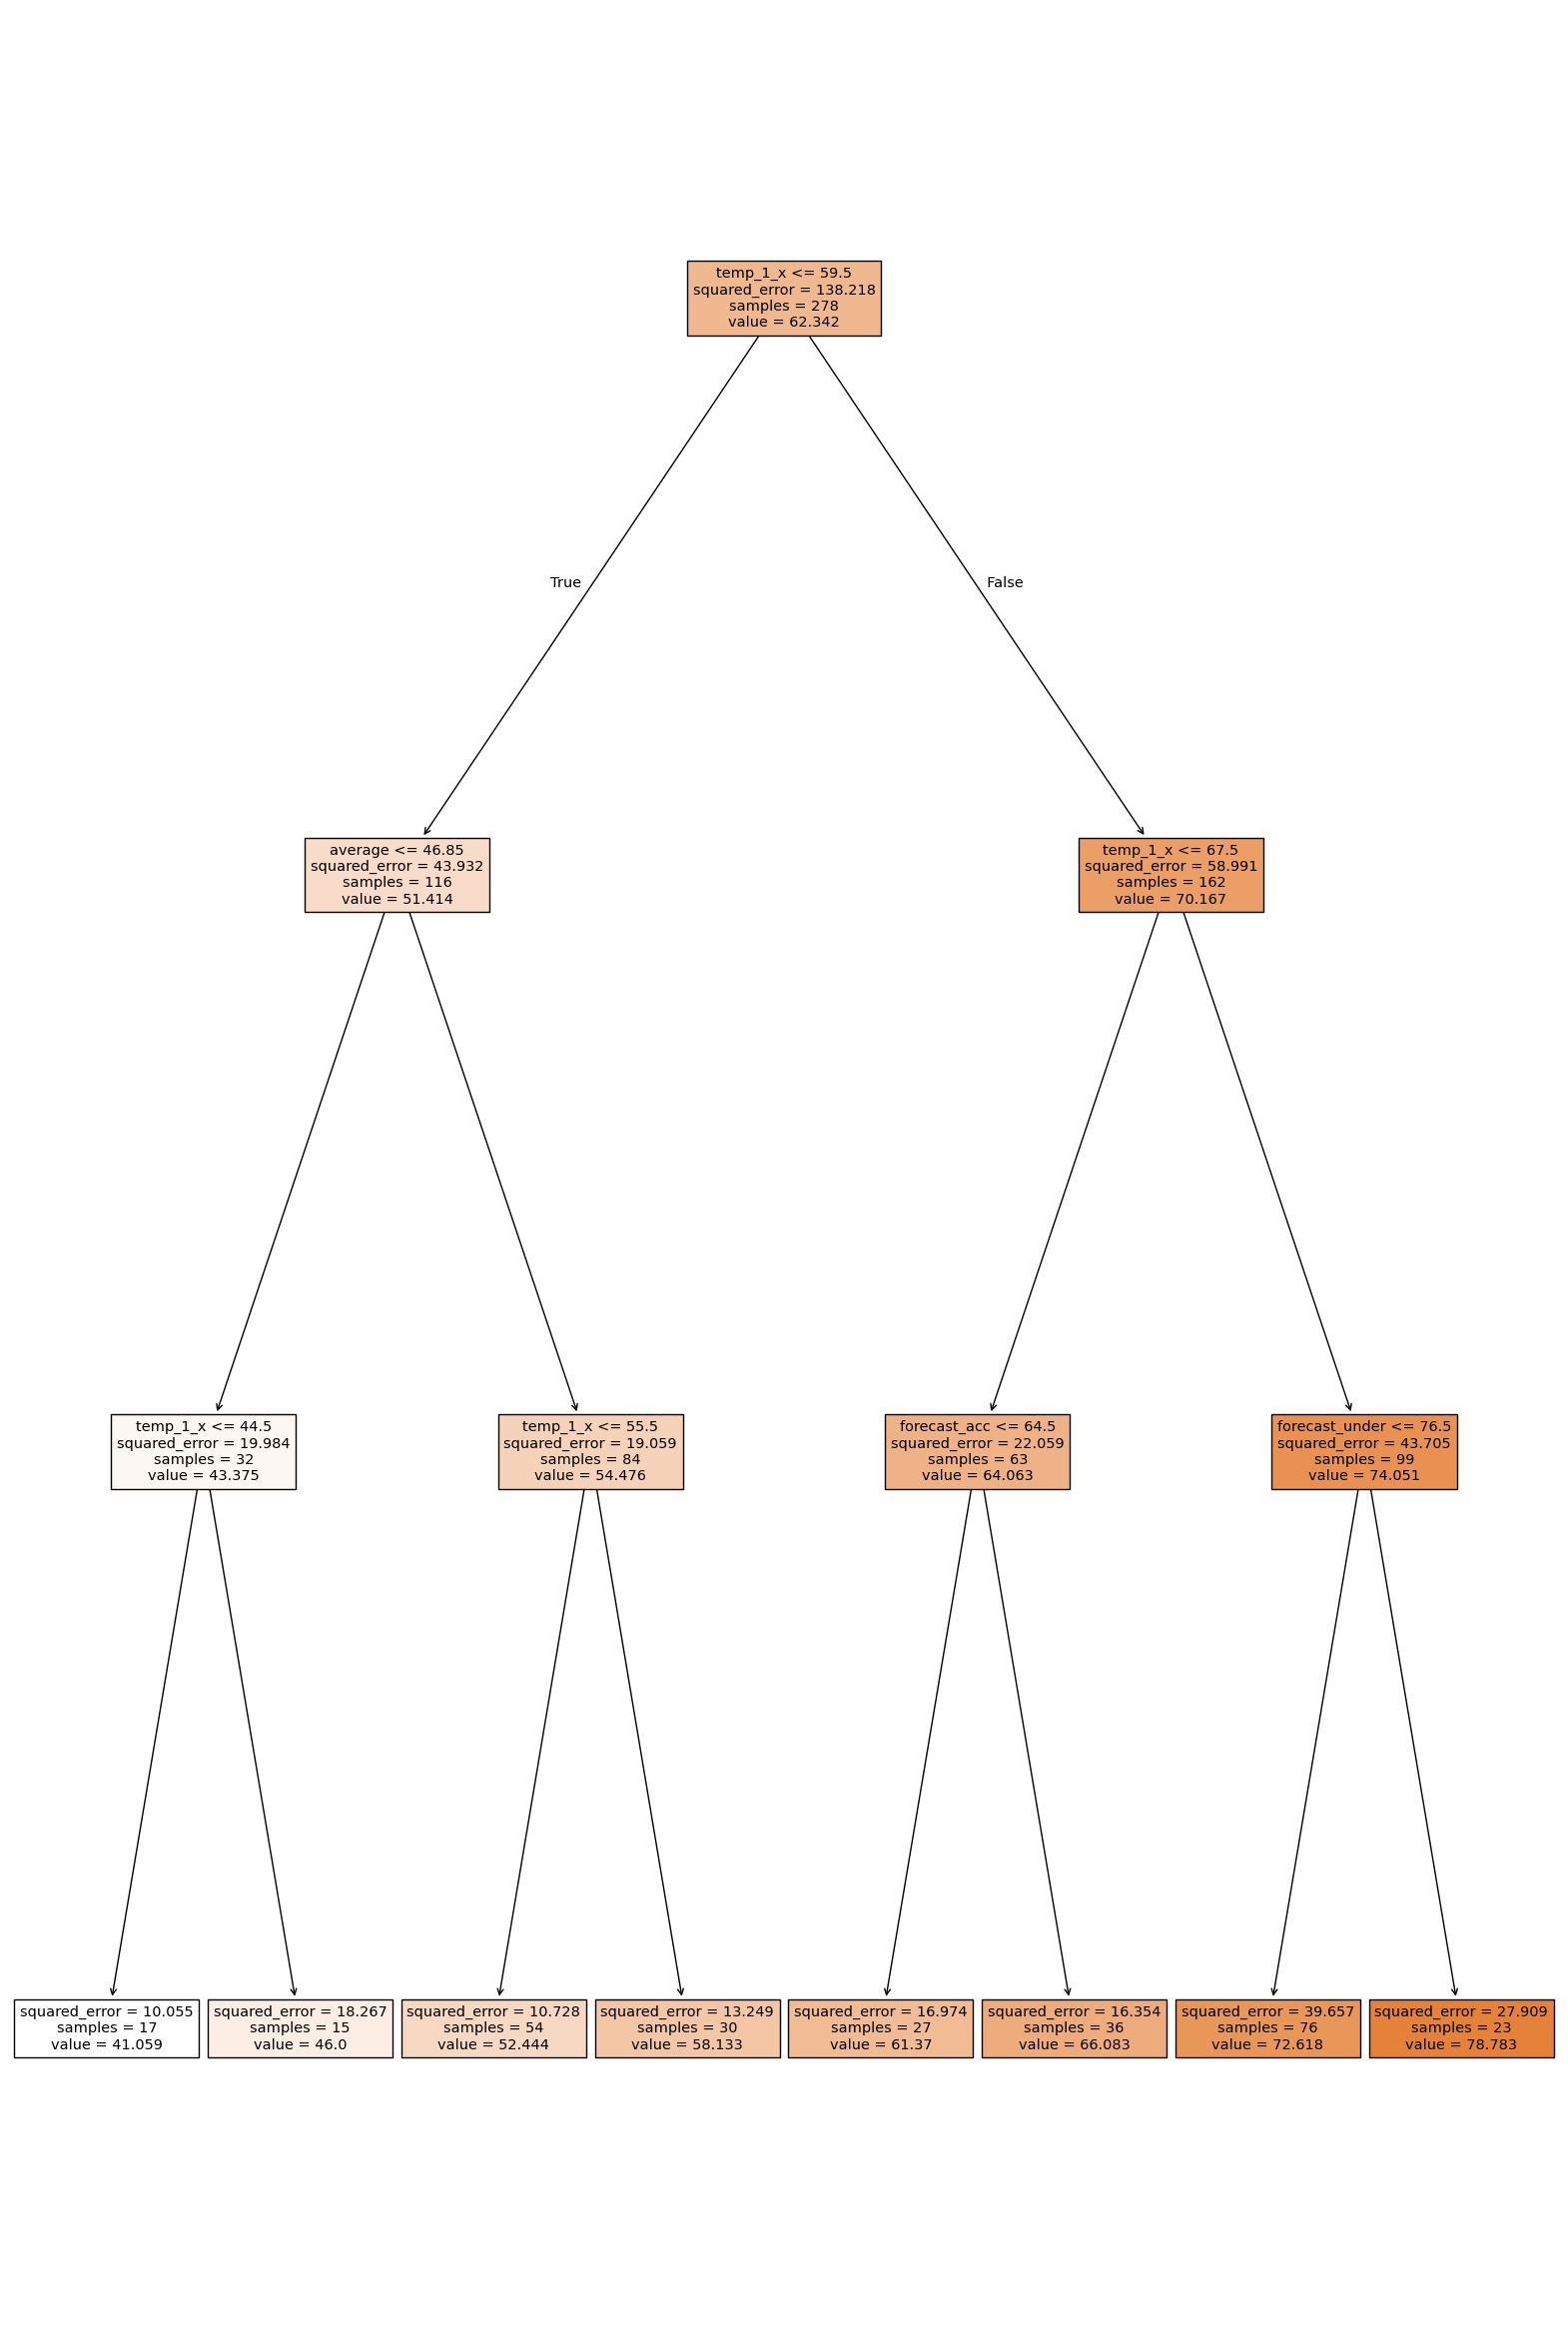

In [134]:
import sklearn
plt.figure(figsize=(20,30))
sklearn.tree.plot_tree(dtr3,
               feature_names=x.columns,
               class_names=['actual'],
               filled = True);

In [135]:
plt.figure(figsize=(15,15))

# mejor no?

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [136]:
dtr3.feature_importances_
df_feature_imp = pd.DataFrame(
    {
        'feature_value': dtr3.feature_importances_
    }
)
df_feature_imp

,feature_value
0,0.000000
1,0.000000
2,0.880208
3,0.088412
4,0.000000
5,0.010610
6,0.020771
7,0.000000
8,0.000000


In [137]:
x_train.columns
df_features = pd.DataFrame(
    {
        'feature':x_train.columns
    }
)

In [138]:
pd.concat([df_features,df_feature_imp],axis = 1).sort_values('feature_value',ascending=False)

,feature,feature_value
2,temp_1_x,0.880208
3,average,0.088412
6,forecast_under,0.020771
5,forecast_acc,0.010610
0,month,0.000000
4,forecast_noaa,0.000000
1,temp_2,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [140]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']

x_nueva= df.loc[:,['temp_1_x','average','forecast_under']]
x_train, x_test, y_train, y_test = train_test_split(x_nueva,y,train_size=278,random_state=42)

In [141]:
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(x_train,y_train)
y_pred_ = dtr3.predict(x_test)

In [142]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [143]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']]

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0
...,...,...
343,47,0
344,48,0
345,48,0
346,57,0


<Axes: >

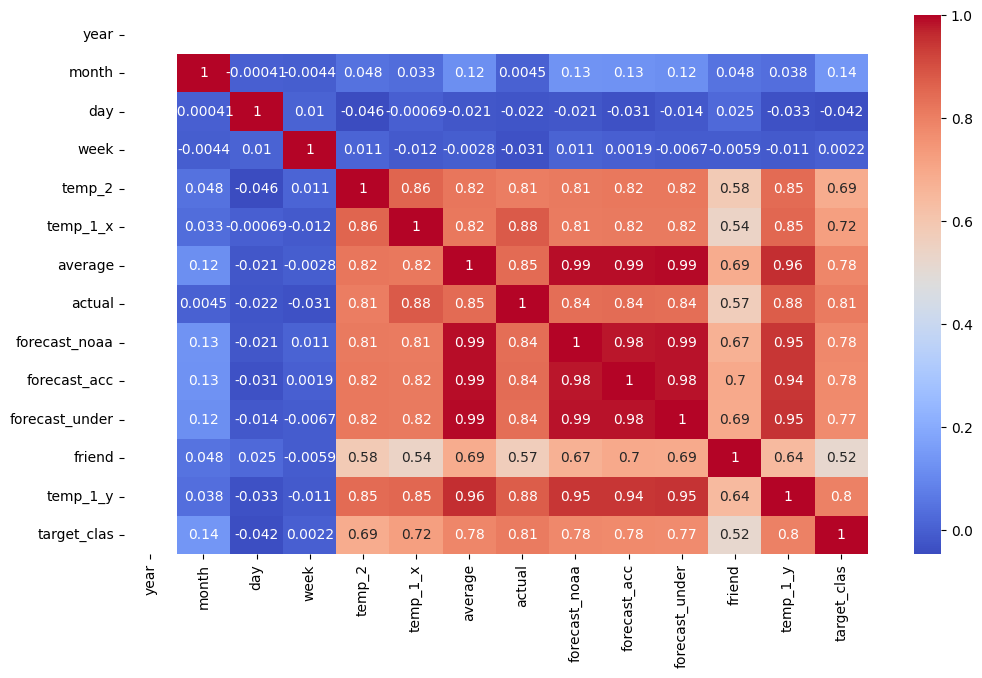

In [144]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [145]:
df['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [147]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
dtc.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0])

In [149]:
dtc.feature_importances_

array([0.        , 0.03503771, 0.11082627, 0.68032377, 0.06990714,
       0.03192435, 0.01985585, 0.05212491, 0.        ])

In [150]:
y_test

255    1
114    1
314    0
268    1
167    1
      ..
93     1
180    1
183    1
197    1
325    0
Name: target_clas, Length: 70, dtype: int64

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test,dtc.predict(X_test))

0.8571428571428571

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [158]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred,y_test)

c:\Users\Marcos\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8142857142857143

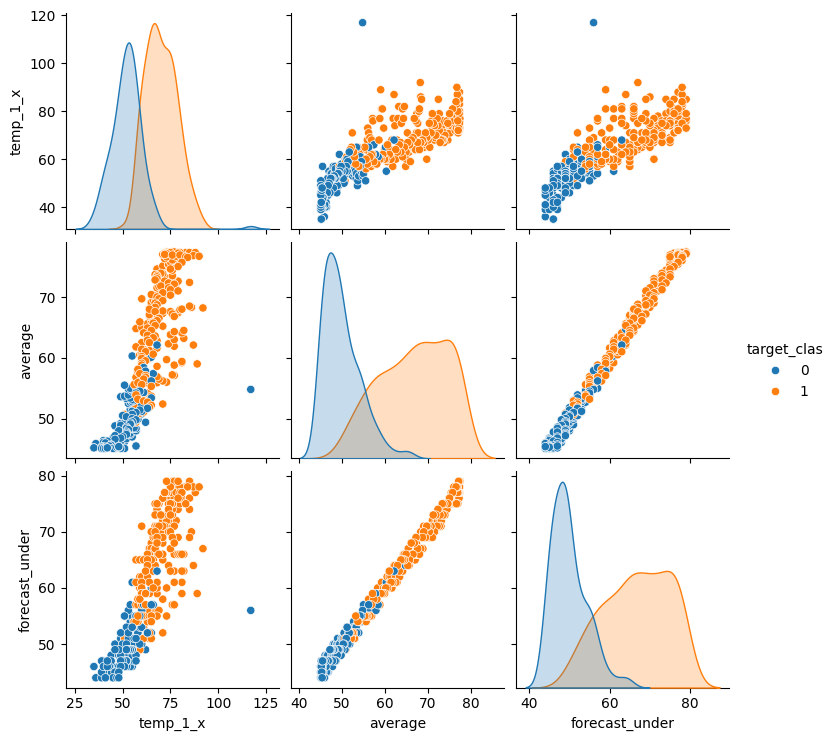

In [159]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [160]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.predict(X_test)


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0])

In [161]:
accuracy_score(y_test,rfc.predict(X_test))

0.9142857142857143